In [106]:
import csv
import math
from numpy import genfromtxt
import numpy as np
import matplotlib.pyplot as plt
data = csv.reader(open('aku1.csv'), delimiter=",")
# data2 = csv.reader(open('aku2.csv'), delimiter=",")
rssiBagus, jarakBagus = [], []
for row in data:
    rssiBagus.append(row[3])

In [107]:
results1 = list(map(int,rssiBagus))
print(results1)

[85, 85, 82, 96, 93, 92, 92, 89, 85, 78, 94, 88, 79, 77, 97, 91, 85, 83, 80, 84, 79, 84, 81, 96, 77, 85, 93, 88, 72, 79, 116, 92, 69, 101, 103, 83, 82, 90, 91, 78, 93, 113, 78, 91, 90, 78, 85, 92, 115, 85, 88, 99, 104, 106, 96, 107, 109, 97, 109, 111, 103, 95, 100, 95, 111, 93, 81, 94, 111, 101, 103, 98, 90, 101, 89, 113, 106, 102, 85, 78, 86, 80, 85, 89, 111, 80, 92, 100, 105, 84, 101, 105, 107, 95, 78, 95, 102, 76, 92, 103, 75, 102, 109, 100, 88, 90, 73, 93, 86, 76, 80, 106, 100, 95, 97, 95, 82, 84, 81, 84, 75, 89, 89, 103, 49, 80, 93, 78, 67, 71, 72, 97, 68, 66, 95, 89, 67, 75, 72, 70, 97, 92, 84, 85, 59, 92, 73, 72, 64, 81, 97, 77, 87, 86, 93, 69, 65, 70, 76, 100, 85, 97, 72, 95, 97, 92, 63, 80, 79, 67, 64, 81, 64, 62, 70, 85, 83, 101, 80, 70, 96, 59, 91, 85, 60, 59, 58, 89, 58, 58, 58, 60, 59, 71, 56, 85, 59, 86, 104, 56, 81, 91, 53, 56, 72, 74, 74, 88, 50, 87, 77, 76, 52, 74, 48, 61, 60, 46, 95, 89, 58, 59, 63, 71, 59, 59, 61, 57, 60, 75, 74, 104, 74, 58, 62, 73, 70, 61, 73, 98, 

In [108]:
"""
Description
-----------
Simple Implementation of the Kalman Filter for 1D data, without any dependencies
Originally written in JavaScript by Wouter Bulten
Now rewritten in Python
License
-------
MIT License
2017
Author
------
Sifan Ye
See
---
https://github.com/wouterbulten/kalmanjs
    
"""

import math

class KalmanFilter:

    cov = float('nan')
    x = float('nan')

    def __init__(self, R, Q):
        """
        Constructor
        :param R: Process Noise
        :param Q: Measurement Noise
        """
        self.A = 1
        self.B = 0
        self.C = 1

        self.R = R
        self.Q = Q

    def filter(self, measurement):
        """
        Filters a measurement
        :param measurement: The measurement value to be filtered
        :return: The filtered value
        """
        u = 0
        if math.isnan(self.x):
            self.x = (1 / self.C) * measurement
            self.cov = (1 / self.C) * self.Q * (1 / self.C)
        else:
            predX = (self.A * self.x) + (self.B * u)
            predCov = ((self.A * self.cov) * self.A) + self.R

            # Kalman Gain
            K = predCov * self.C * (1 / ((self.C * predCov * self.C) + self.Q));

            # Correction
            self.x = predX + K * (measurement - (self.C * predX));
            self.cov = predCov - (K * self.C * predCov);

        return self.x

    def last_measurement(self):
        """
        Returns the last measurement fed into the filter
        :return: The last measurement fed into the filter
        """
        return self.x

    def set_measurement_noise(self, noise):
        """
        Sets measurement noise
        :param noise: The new measurement noise
        """
        self.Q = noise

    def set_process_noise(self, noise):
        """
        Sets process noise
        :param noise: The new process noise
        """
        self.R = noise



In [109]:
test = KalmanFilter(0.008, 0.1)
testData = [85, 85, 82, 96, 93, 92, 92, 89, 85, 78, 94, 88, 79, 77, 97, 91, 85, 83, 80, 84, 79, 84, 81, 96, 77, 85, 93, 88, 72, 79, 116, 92, 69, 101, 103, 83, 82, 90, 91, 78, 93, 113, 78, 91, 90, 78, 85, 92, 115, 85, 88, 99, 104, 106, 96, 107, 109, 97, 109, 111, 103, 95, 100, 95, 111, 93, 81, 94, 111, 101, 103, 98, 90, 101, 89, 113, 106, 102, 85, 78, 86, 80, 85, 89, 111, 80, 92, 100, 105, 84, 101, 105, 107, 95, 78, 95, 102, 76, 92, 103, 75, 102, 109, 100, 88, 90, 73, 93, 86, 76, 80, 106, 100, 95, 97, 95, 82, 84, 81, 84, 75, 89, 89, 103, 49, 80, 93, 78, 67, 71, 72, 97, 68, 66, 95, 89, 67, 75, 72, 70, 97, 92, 84, 85, 59, 92, 73, 72, 64, 81, 97, 77, 87, 86, 93, 69, 65, 70, 76, 100, 85, 97, 72, 95, 97, 92, 63, 80, 79, 67, 64, 81, 64, 62, 70, 85, 83, 101, 80, 70, 96, 59, 91, 85, 60, 59, 58, 89, 58, 58, 58, 60, 59, 71, 56, 85, 59, 86, 104, 56, 81, 91, 53, 56, 72, 74, 74, 88, 50, 87, 77, 76, 52, 74, 48, 61, 60, 46, 95, 89, 58, 59, 63, 71, 59, 59, 61, 57, 60, 75, 74, 104, 74, 58, 62, 73, 70, 61, 73, 98, 85, 62, 70, 96, 63, 70, 73, 78, 82, 82, 79, 75, 79, 67, 67, 60, 97, 65, 89, 110, 93, 67, 70, 73, 74, 64, 91, 69, 80, 99, 69, 79, 88, 70, 64, 65, 64, 65, 76, 93, 64, 65, 96, 73, 103, 63, 64, 61, 79, 112, 77, 70, 85, 70, 63, 67, 109, 68, 72, 106, 87, 87, 80, 98, 95, 81, 77, 68, 93, 79, 75, 91, 78, 85, 82, 75, 58, 74, 88, 79, 85, 77, 82, 56, 88, 87, 106, 84, 86, 84, 96, 61, 93, 107, 77, 62, 82, 104, 61, 84, 59, 97, 99, 80, 84, 55, 76, 96, 88, 98, 80, 80, 80, 101, 85, 78, 94, 80, 64, 104, 64, 67, 77, 69, 93, 85, 101, 96, 84, 82, 70, 70, 99, 106, 104, 87, 66, 102, 68, 97, 71, 77, 63, 94, 59, 70, 114, 106, 59, 63, 65, 91, 107, 102, 91, 103, 65, 63, 95, 104, 59, 59, 61, 98, 97, 98, 90, 97, 112, 106, 106, 89, 69, 101, 67, 70, 72, 93, 106, 117, 71, 97, 69, 78, 80, 72, 92, 89, 96, 67, 74, 97, 60, 70, 96, 73, 106, 79, 106, 80, 102, 84, 77, 78, 88, 64, 92, 81, 73, 73, 97, 72, 91, 80, 92, 88, 92, 90, 79, 97, 86, 60, 90, 83, 59, 99, 82, 80, 93, 104, 94, 87, 90, 95, 94, 88, 91, 95, 98, 98, 97, 91, 112, 116, 106, 81]
for x in testData:
    print ("Filtered Data: ", test.filter(x))

Filtered Data:  85.0
Filtered Data:  85.0
Filtered Data:  83.87590187590187
Filtered Data:  87.6655644905301
Filtered Data:  89.16936671072291
Filtered Data:  89.92156281149043
Filtered Data:  90.4555366333476
Filtered Data:  90.08873096270375
Filtered Data:  88.82034802053113
Filtered Data:  86.14017019138899
Filtered Data:  88.0801069138829
Filtered Data:  88.06037527111351
Filtered Data:  85.83123242796339
Filtered Data:  83.65989357044964
Filtered Data:  86.93860471383543
Filtered Data:  87.93659586939012
Filtered Data:  87.21508476651726
Filtered Data:  86.17952488311678
Filtered Data:  84.6614018857985
Filtered Data:  84.49891900465828
Filtered Data:  83.14804765583472
Filtered Data:  83.3573378264107
Filtered Data:  82.77823782084705
Filtered Data:  86.02626809957557
Filtered Data:  83.80889702133007
Filtered Data:  84.10150026179674
Filtered Data:  86.28748147658646
Filtered Data:  86.70817401060852
Filtered Data:  83.09500542465815
Filtered Data:  82.08903800995581
Filtered Da

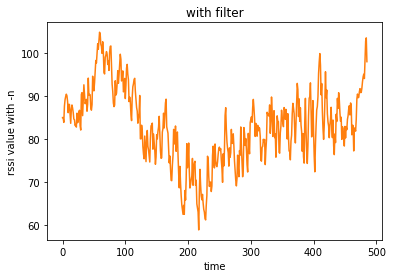

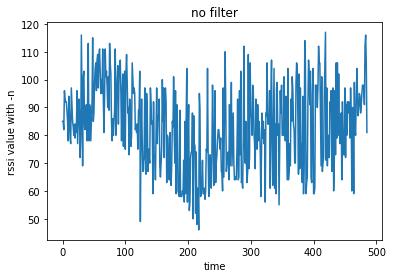

In [110]:
# data = csv.reader(open('hasil1filter.csv'), delimiter=",")
# rssi=[]
# for row in data:
#     rssi.append(row[1])
# print(rssi)
# # array = data
data1 = genfromtxt('hasil1filter.csv',delimiter=',')
data2 = genfromtxt('hasil1nofilter.csv',delimiter=',')

plt.plot(data1)
plt.title('with filter')
plt.ylabel('rssi value with -n')
plt.xlabel('time')

plt.show()

plt.plot(data2)
plt.title('no filter')
plt.ylabel('rssi value with -n')
plt.xlabel('time')

plt.show()

In [112]:
data2 = csv.reader(open('aku2.csv'), delimiter=",")
rssi = []
for row in data2:
    rssi.append(row[3])
results2 = list(map(int,rssi))
print(results2)

[102, 93, 86, 102, 102, 84, 101, 90, 84, 78, 93, 92, 82, 79, 92, 91, 81, 100, 93, 86, 85, 75, 104, 104, 89, 87, 80, 93, 92, 84, 83, 81, 80, 77, 109, 101, 101, 98, 92, 79, 104, 100, 98, 97, 95, 87, 79, 78, 105, 102, 100, 96, 92, 89, 84, 101, 99, 99, 95, 93, 91, 80, 108, 100, 99, 98, 97, 97, 91, 88, 101, 100, 100, 94, 93, 89, 87, 81, 109, 96, 95, 93, 91, 89, 89, 81, 104, 101, 99, 98, 95, 93, 92, 92, 86, 86, 84, 81, 79, 116, 106, 101, 101, 99, 97, 93, 92, 89, 113, 113, 108, 108, 106, 100, 98, 91, 114, 109, 107, 101, 99, 90, 105, 111, 112, 90, 86, 106, 111, 77, 112, 101, 108, 98, 109, 107, 102, 97, 107, 102, 105, 78, 104, 91, 106, 109, 92, 99, 106, 82, 107, 107, 107, 91, 80, 109, 105, 109, 95, 89, 96, 75, 106, 103, 81, 106, 74, 102, 106, 109, 102, 72, 54, 91, 104, 77, 85, 97, 113, 70, 85, 105, 105, 108, 104, 66, 104, 110, 106, 105, 84, 100, 95, 67, 70, 86, 99, 61, 62, 95, 85, 95, 92, 98, 92, 84, 113, 98, 90, 61, 98, 75, 73, 62, 75, 70, 89, 88, 64, 96, 98, 98, 98, 78, 95, 69, 101, 103, 105,

In [113]:
test = KalmanFilter(0.008, 0.1)
testData = [102, 93, 86, 102, 102, 84, 101, 90, 84, 78, 93, 92, 82, 79, 92, 91, 81, 100, 93, 86, 85, 75, 104, 104, 89, 87, 80, 93, 92, 84, 83, 81, 80, 77, 109, 101, 101, 98, 92, 79, 104, 100, 98, 97, 95, 87, 79, 78, 105, 102, 100, 96, 92, 89, 84, 101, 99, 99, 95, 93, 91, 80, 108, 100, 99, 98, 97, 97, 91, 88, 101, 100, 100, 94, 93, 89, 87, 81, 109, 96, 95, 93, 91, 89, 89, 81, 104, 101, 99, 98, 95, 93, 92, 92, 86, 86, 84, 81, 79, 116, 106, 101, 101, 99, 97, 93, 92, 89, 113, 113, 108, 108, 106, 100, 98, 91, 114, 109, 107, 101, 99, 90, 105, 111, 112, 90, 86, 106, 111, 77, 112, 101, 108, 98, 109, 107, 102, 97, 107, 102, 105, 78, 104, 91, 106, 109, 92, 99, 106, 82, 107, 107, 107, 91, 80, 109, 105, 109, 95, 89, 96, 75, 106, 103, 81, 106, 74, 102, 106, 109, 102, 72, 54, 91, 104, 77, 85, 97, 113, 70, 85, 105, 105, 108, 104, 66, 104, 110, 106, 105, 84, 100, 95, 67, 70, 86, 99, 61, 62, 95, 85, 95, 92, 98, 92, 84, 113, 98, 90, 61, 98, 75, 73, 62, 75, 70, 89, 88, 64, 96, 98, 98, 98, 78, 95, 69, 101, 103, 105, 92, 73, 79, 105, 59, 60, 83, 93, 101, 84, 90, 93, 105, 96, 95, 91, 93, 91, 74, 64, 91, 101, 99, 91, 85, 83, 47, 100, 107, 80, 91, 51, 100, 56, 63, 63, 96, 82, 100, 90, 89, 70, 99, 100, 79, 90, 65, 68, 78, 101, 80, 74, 83, 74, 105, 97, 67, 69, 68, 84, 74, 65, 67, 73, 89, 88, 105, 71, 69, 85, 86, 92, 96, 85, 71, 98, 68, 73, 100, 94, 105, 84, 98, 69, 106, 59, 74, 68, 95, 77, 67, 95, 89, 87, 96, 94, 93, 72, 69, 93, 100, 91, 93, 97, 87, 85, 90, 90, 94, 89, 92, 79, 88, 92, 76, 91, 74, 78, 91, 69, 97, 63, 106, 88, 100, 84, 88, 61, 101, 59, 87, 91, 88, 95, 83, 63, 80, 100, 70, 58, 103, 68, 94, 96, 85, 92, 79, 76, 91, 86, 79, 90, 87, 107, 99, 95, 79, 72, 86, 82, 85, 69, 73, 107, 60, 66, 104, 95, 95, 88, 82, 69, 108, 109, 97, 105, 74, 75, 117, 106, 91, 115, 110, 65, 66, 103, 100, 68, 108, 63, 94, 111, 110, 67, 100, 70, 64, 60, 58, 106, 112, 65, 71, 65, 94, 82, 78, 99, 93, 70, 75, 75, 106, 81, 103, 84, 96, 75, 79, 73, 77, 109, 95, 79, 96, 72, 98, 69, 96, 77, 102, 73, 76, 91, 81, 91, 93, 89, 84, 95, 106, 91, 92, 94, 86, 81, 89, 103, 79, 91, 77, 83, 95, 85, 89, 92, 54, 89, 89, 92, 111, 105, 81, 96, 90, 91, 96, 110, 93, 92, 89, 94, 103, 91, 94, 96, 93, 85]
for x in testData:
    print ("Filtered Data: ", test.filter(x))

Filtered Data:  102.0
Filtered Data:  97.32692307692308
Filtered Data:  93.08273208273208
Filtered Data:  95.87002698127182
Filtered Data:  97.59809493127719
Filtered Data:  93.98461591796935
Filtered Data:  95.786946760964
Filtered Data:  94.32859467349114
Filtered Data:  91.75415845422785
Filtered Data:  88.34728184752515
Filtered Data:  89.49565007217952
Filtered Data:  90.11251240964931
Filtered Data:  88.11657422421983
Filtered Data:  85.87507825840459
Filtered Data:  87.38045224268184
Filtered Data:  88.2698698921327
Filtered Data:  86.48368885909046
Filtered Data:  89.80436931141978
Filtered Data:  90.58943944723623
Filtered Data:  89.46197767215334
Filtered Data:  88.36584263337639
Filtered Data:  85.0823966709477
Filtered Data:  89.72966617571166
Filtered Data:  93.23528635861997
Filtered Data:  92.19485620785443
Filtered Data:  90.91870142745586
Filtered Data:  88.23644296675768
Filtered Data:  89.4066451291721
Filtered Data:  90.04372137974804
Filtered Data:  88.559037932210

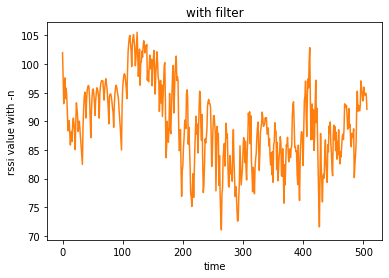

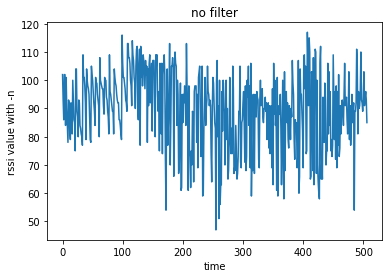

In [114]:
data1 = genfromtxt('hasil2filter.csv',delimiter=',')
data2 = genfromtxt('hasil2nofilter.csv',delimiter=',')

plt.plot(data1)
plt.title('with filter')
plt.ylabel('rssi value with -n')
plt.xlabel('time')

plt.show()

plt.plot(data2)
plt.title('no filter')
plt.ylabel('rssi value with -n')
plt.xlabel('time')

plt.show()